## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
count_mice = complete_df['Mouse ID'].nunique()
count_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(complete_df['Mouse ID'].value_counts() >1 & (complete_df['Mouse ID'].value_counts() >1))




g989    True
a699    True
e662    True
w350    True
j984    True
        ... 
n482    True
t573    True
x226    True
o848    True
u153    True
Name: Mouse ID, Length: 249, dtype: bool


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# duplicate_mice = ((complete_df['Mouse ID'].value_counts() > 1) = True)
duplicate_mice = complete_df.duplicated(subset ="Mouse ID", 
                     keep = False)
duplicate_mice_df = complete_df[duplicate_mice]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mice_df = complete_df.drop_duplicates(subset ="Mouse ID", 
                     keep = 'last', inplace = False)
unique_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice_df['Mouse ID'].count()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
g_unique_mice_df = unique_mice_df.groupby(['Drug Regimen'])
tumors = g_unique_mice_df['Tumor Volume (mm3)']

u_mice_mean = tumors.mean()
u_mice_median = tumors.median()
u_mice_var = tumors.var()
u_mice_std = tumors.std()
u_mice_sem = tumors.sem()


stats_table = pd.DataFrame({'Mean': u_mice_mean,'Median': u_mice_median,'Variance': u_mice_var, 
                     'Standard Deviation': u_mice_std,'SEM': u_mice_sem})
stats_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

Text(0.5, 1.0, 'Mice per Drug Treatment')

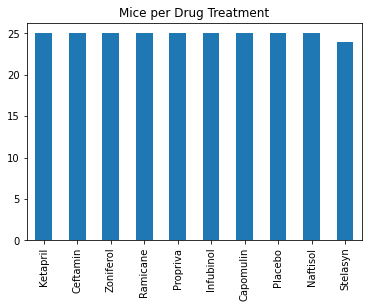

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treat_count = unique_mice_df['Drug Regimen'].value_counts()
treat_count.plot(kind="bar")
plt.title("Mice per Drug Treatment")

In [44]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



Text(0, 0.5, '')

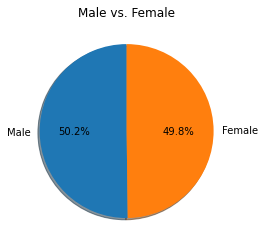

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count = unique_mice_df['Sex'].value_counts()
gender_count.index.name = None
gender_count.plot(kind="pie",autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Male vs. Female")
plt.ylabel('')

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
